In [1]:
import math
import random
#Benötigte Pakete

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle 
import seaborn as sns
from scipy import stats
from decimal import Decimal

import matplotlib.mlab as mlab
import numpy as np
import cmath

from numpy import linalg as LA
import scipy
from scipy import spatial
import time
#import table

import os
#import h5py

from matplotlib import animation
import matplotlib
from scipy.optimize import curve_fit
from matplotlib import rc

import gc
import sys
gc.enable()
import copy

from mpl_toolkits import mplot3d

from scipy.odr import *

def poly_func_scipy(N,*a):
    return a[0]*N**(-a[1])

def poly_func(a,N):
    return a[0]*N**(-a[1])

In [2]:
import multiprocessing as mp
from init_atoms import *

In [3]:
def calculation(atoms):
    number_atoms=len(atoms)
    
    #Distance + Hamiltonian-------------------------------------------------------------------------------------
    distance_matrix = np.zeros((number_atoms,number_atoms),dtype=np.float16)
    distance_matrix= scipy.spatial.distance.cdist(atoms, atoms, metric='euclidean')
    
    np.fill_diagonal(distance_matrix,1)
    H=np.divide(coupling_constant,np.power(distance_matrix,3), out=distance_matrix)
    np.fill_diagonal(H,0)

#Linearisierung---------------------------------------------------------------------------------------------
    eigenvalues=np.zeros(number_atoms,dtype=np.float16)
    eigenvectors=np.zeros((number_atoms,number_atoms),dtype=np.float16)
    eigenvalues, eigenvectors = LA.eigh(H)
    
# Berechnung-----------------------------------------------------------------------------------------------
    p_eigenstates = np.square(np.absolute(eigenvectors), out=eigenvectors)  
   
    ipr_2=np.sum(p_eigenstates**2,axis=0)
    
    ratio = np.zeros([number_atoms])
    for n in range(1,number_atoms-1):
        delta_n = eigenvalues[n+1]-eigenvalues[n]
        delta_n_1 = eigenvalues[n]-eigenvalues[n-1]
   
        if np.max([delta_n,delta_n_1])==0:
            ratio[n]=0
        else:
            ratio[n] = np.min([delta_n,delta_n_1])/np.max([delta_n,delta_n_1])
        
    ratio[0]=-1
    ratio[-1]=-1
    
    return ipr_2, p_eigenstates,ratio, eigenvalues

## Calculation

In [125]:
global number_atoms
global radius

number_atoms=1000
r_b = 2.5
coupling_constant= -2.72*10**9 
density_1d=0.7
laenge=number_atoms*2*r_b/density_1d


global angeregt
angeregt=0                  #atom 0 is atom in the center
iteration=100


In [126]:
def calc(i):
    atoms_array_tmp= produce_atoms_1D(number_atoms, laenge/2, r_b,versuch_max=1000)                 
    ipr_2_tmp, p_eigenstates_tmp,ratio_tmp,eigenvalues_tmp = calculation(atoms_array_tmp)
    return atoms_array_tmp,ipr_2_tmp, p_eigenstates_tmp,ratio_tmp,eigenvalues_tmp

pool = mp.Pool(2)
start=time.time()
atoms_array_all,ipr_2_all,p_eigenstates_all, ratio_all,eigenvalues_all=zip(*pool.map(calc,np.arange(0,iteration,1)))
print(time.time()-start)
pool.close()

atoms_array_all=np.array(atoms_array_all)
ipr_2_all=np.array(ipr_2_all)
p_eigenstates_all= np.array(p_eigenstates_all)
ratio_all=np.array(ratio_all)
eigenvalues_all=np.array(eigenvalues_all)
pr_2_all=np.array(1/ipr_2_all)

89.67922592163086


## Auswertung

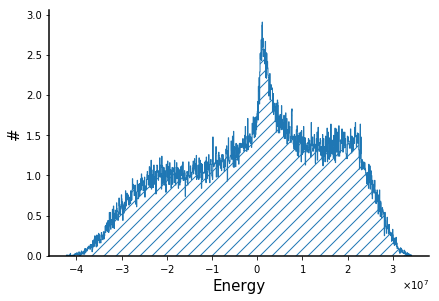

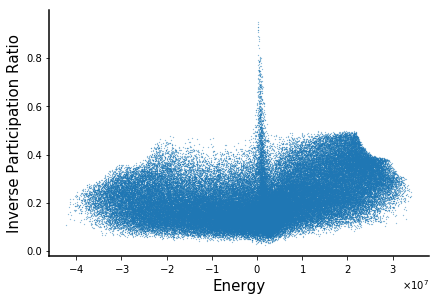

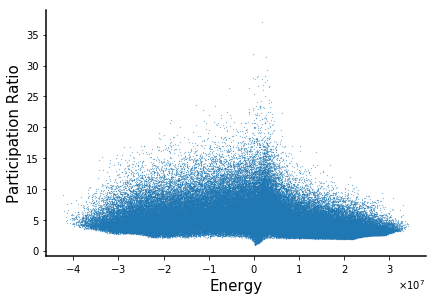

In [127]:
plot=0

fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)


axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
#axes.ticklabel_format(axis="y", style="scientific",scilimits=(0,0),useMathText=True)

axes.hist(np.ravel(eigenvalues_all),bins=1000,histtype='step', hatch="//", weights=np.ones_like(np.ravel(eigenvalues_all))/iteration)  
    
 
axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("#",fontsize=15);

#fig.savefig("figures/Eigenstates/DOS_001.png",bbox_inches = "tight")#, dpi=1200)


#----------------------------------------------------------------------------------------------------------

fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)


axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
#axes.ticklabel_format(axis="y", style="scientific",scilimits=(0,0),useMathText=True)
    
    
axes.errorbar(np.ravel(eigenvalues_all),np.ravel(ipr_2_all), linestyle="None", marker=".", markersize=0.4) ;   
axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("Inverse Participation Ratio",fontsize=15);

#fig.savefig("figures/Eigenstates/IPR_001.png",bbox_inches = "tight")#, dpi=1200)

    
#------------------------------------------------------------------------------------------------------


fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)


axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
#axes.ticklabel_format(axis="y", style="scientific",scilimits=(0,0),useMathText=True)
    

axes.errorbar(np.ravel(eigenvalues_all),1/np.ravel(ipr_2_all), linestyle="None", marker=".",markersize=0.4) ;   
axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("Participation Ratio",fontsize=15);

#fig.savefig("figures/Eigenstates/PR_001.png",bbox_inches = "tight")#, dpi=1200)


In [157]:
def radial_dens(p_eigenstate, atoms_array):
    schwerpunkt= np.dot(p_eigenstate,atoms_array) 
    distanz= scipy.spatial.distance.cdist([schwerpunkt],atoms_array, metric='euclidean')[0]

    density_eig_schwerpunkt=[]
    max_abstand=np.max(distanz)

    d_r=r_b
    radius_array_sp=np.arange(0,max_abstand,d_r)
    for klein in radius_array_sp:
        index = np.argwhere((klein<=distanz) & (distanz<klein+d_r))
        laenge= len(index)

        if laenge==0:
            density_eig_schwerpunkt.append(0)
        else:
            density_eig_schwerpunkt.append(np.sum(p_eigenstate[index])/len(index))

    distanz= scipy.spatial.distance.cdist([[0,0]],atoms_array, metric='euclidean')[0]
    density_eig_ursprung=[]
    max_abstand=np.max(distanz)

    d_r=r_b
    radius_array_us=np.arange(0,max_abstand,d_r)
    for klein in radius_array_us:
        index = np.argwhere((klein<=distanz) & (distanz<klein+d_r))
        laenge= len(index)

        if laenge==0:
            density_eig_ursprung.append(0)
        else:
            density_eig_ursprung.append(np.sum(p_eigenstate[index])/len(index))
            
    return radius_array_sp, radius_array_us, density_eig_schwerpunkt, density_eig_ursprung



def only_infinity_results():
    #infinity_time-------------------------------------------------------------------------------------
    p_infinity=np.dot(np.square(eigenvectors[angeregt]),np.square(eigenvectors.transpose()))

    p_infinity_g=np.dot(np.power(eigenvectors[angeregt],4),np.power(eigenvectors.transpose(),4))
    
    ipr_inf = 1/(np.sum(2*p_infinity**2-p_infinity_g))


    #accumulation, correlation, radial densitiy--------------------------------------------------------------    
    n_ursprung_inf=[]    
    n_intervall_inf=[]
    density_inf=[]
    correlation_inf=[]
    
    global d_r
    d_r=r_b*5
    
    for i in range(0,int(radius-d_r),d_r):
        flaeche= np.pi*((i+d_r)**2-i**2)
        
        n_ursprung_inf.append(np.sum(p_infinity[(i<=abstand_ursprung)]))
        indices=np.where((distance_matrix!=0) & (i<=distance_matrix)& (distance_matrix<i+d_r))
        correlation_inf.append(np.sum(p_infinity[indices[0]]*p_infinity[indices[1]])/flaeche)
        n_intervall_inf.append((np.sum(p_infinity[(i<=abstand_ursprung)& (abstand_ursprung<i+d_r)]))/(flaeche))
        
        index = np.argwhere((i<=abstand_ursprung)& (abstand_ursprung<i+d_r))
        laenge= len(index)
        if laenge==0:
            density_inf.append(0)
        else:
            density_inf.append(np.sum(p_infinity[index])/len(index))

        



(99, 371)


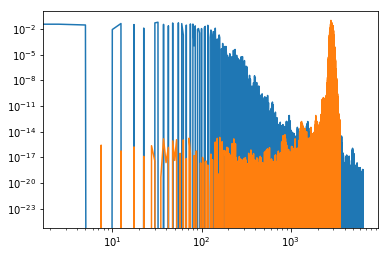

In [174]:
for i in range(iteration):
    ipr_max=1
    tmp_max=np.min(ipr_2_all[i])
    if ipr_max>tmp_max:
        ipr_max=tmp_max
        index=i,np.argmin(ipr_2_all[i])
print(index)
    

x1,x2,y1,y2=radial_dens(p_eigenstates_all[99][:,371],atoms_array_all[99])
plt.plot(x1,y1)
plt.plot(x2,y2)

plt.xscale("log")
plt.yscale("log")

## PR

In [79]:
#Welche der zwei aufeinanderfolgenenden Energien hat max. Abstand der IPrs?

distance_pr=np.zeros((3))
index1=[[] for i in range(3)]
index2=[[] for i in range(3)]
z=0
for it in range(iteration):
    for k in range(number_atoms-1):
        tmp_dis=pr_2_all[it][k]-pr_2_all[it][k+1]
        if (np.max(distance_pr)<tmp_dis) and eigenvalues_all[it][k]<-0.5*10**8:
            distance_pr[z%3]=tmp_dis
            index1[z%3]=(it,k)
            index2[z%3]=(it,k+1)
            z+=1
print(distance_pr)

[0. 0. 0.]


NameError: name 'radius' is not defined

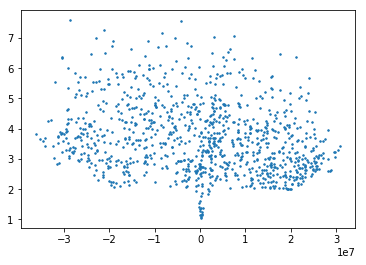

In [80]:

plt.errorbar(eigenvalues_all,pr_2_all, linestyle="none",  marker=".", markersize=3)
z= pow(number_atoms/(np.pi*radius**2), -1.0/2.0)
plt.vlines(8*coupling_constant/z**3,0,50)
plt.vlines(7*coupling_constant/z**3,0,50)

for i in range(len(distance_pr)):
    plt.scatter(eigenvalues_all[index1[i]],pr_2_all[index1[i]], color="red",zorder=10)
    plt.scatter(eigenvalues_all[index2[i]],pr_2_all[index2[i]],zorder=1000, color="green")
    print(eigenvalues_all[index1[i]])

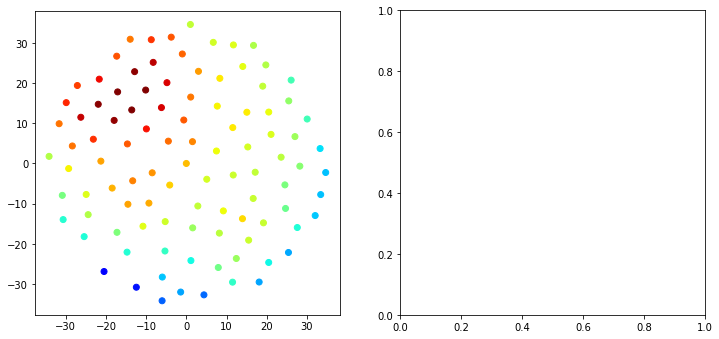

In [315]:
np.argmax(pr_2_all)
fig,ax = plt.subplots(1,2, figsize=(12,8))
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')  
scat= ax[0].scatter(atoms_array_all[4][:,0], atoms_array_all[4][:,1], marker='o', c=p_eigenstates_all[4][:,0], cmap = "jet",
                      norm=matplotlib.colors.LogNorm(vmin=1*10**-4,vmax=0.05))

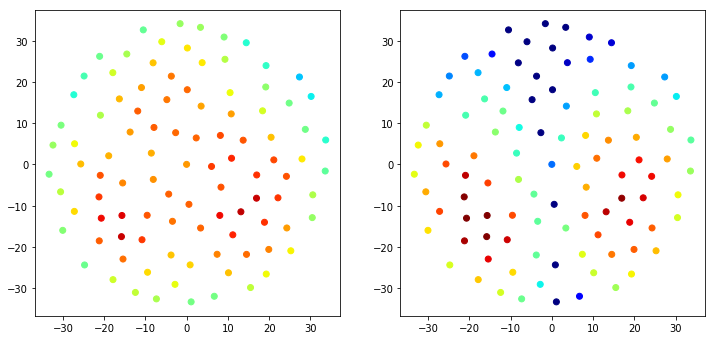

In [297]:
fig,ax = plt.subplots(1,2, figsize=(12,8))
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')  

element=0


scat= ax[0].scatter(atoms_array_all[index1[element][0]][:,0], atoms_array_all[index1[element][0]][:,1], marker='o', c=p_eigenstates_all[index1[element][0]][:,index1[element][1]], cmap = "jet",
                      norm=matplotlib.colors.LogNorm(vmin=1*10**-4,vmax=0.05))

scat= ax[1].scatter(atoms_array_all[index2[element][0]][:,0], atoms_array_all[index2[element][0]][:,1], marker='o', c=p_eigenstates_all[index2[element][0]][:,index2[element][1]], cmap = "jet",
                      norm=matplotlib.colors.LogNorm(vmin=1*10**-4,vmax=0.05))
#vmin=1*10**-4,vmax=1*10**0

In [301]:
def radial_dens(p_eigenstate, atoms_array):
    schwerpunkt= np.dot(p_eigenstate,atoms_array) 
    distanz= scipy.spatial.distance.cdist([schwerpunkt],atoms_array, metric='euclidean')[0]

    density_eig_schwerpunkt=[]
    max_abstand=np.max(distanz)

    d_r=r_b
    radius_array_sp=np.arange(0,max_abstand,d_r)
    for klein in radius_array_sp:
        index = np.argwhere((klein<=distanz) & (distanz<klein+d_r))
        laenge= len(index)

        if laenge==0:
            density_eig_schwerpunkt.append(0)
        else:
            density_eig_schwerpunkt.append(np.sum(p_eigenstate[index])/len(index))


    distanz= scipy.spatial.distance.cdist([[0,0]],atoms_array, metric='euclidean')[0]
    density_eig_ursprung=[]
    max_abstand=np.max(distanz)

    d_r=r_b
    radius_array_us=np.arange(0,max_abstand,d_r)
    for klein in radius_array_us:
        index = np.argwhere((klein<=distanz) & (distanz<klein+d_r))
        laenge= len(index)

        if laenge==0:
            density_eig_ursprung.append(0)
        else:
            density_eig_ursprung.append(np.sum(p_eigenstate[index])/len(index))
            
    return radius_array_sp, radius_array_us, density_eig_schwerpunkt, density_eig_ursprung


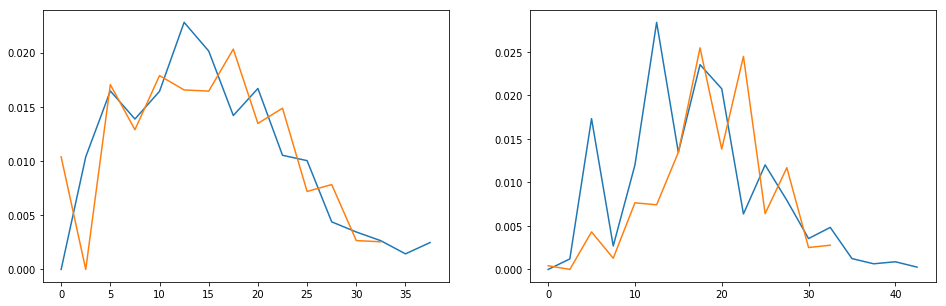

In [305]:
element=0
p_eigenstate=p_eigenstates_all[index1[element][0]][:,index1[element][1]]
atoms_array=atoms_array_all[index1[element][0]]
radius_array_sp, radius_array_us, density_eig_schwerpunkt, density_eig_ursprung =radial_dens(p_eigenstate,atoms_array)


p_eigenstate=p_eigenstates_all[index2[element][0]][:,index2[element][1]]
atoms_array=atoms_array_all[index2[element][0]]
radius_array_sp2, radius_array_us2, density_eig_schwerpunkt2, density_eig_ursprung2=radial_dens(p_eigenstate,atoms_array)

fig,ax=plt.subplots(1,2, figsize=(16,5))
ax[0].plot(radius_array_sp,density_eig_schwerpunkt)
ax[0].plot(radius_array_us,density_eig_ursprung)

ax[1].plot(radius_array_sp2,density_eig_schwerpunkt2)
ax[1].plot(radius_array_us2,density_eig_ursprung2)

## DOS Oscillation

In [54]:
data = open("/home/jp/Dokumente/Bachelorarbeit/Mein_paper/BwHpcCluster/Results/Fractality/q_2/density_0.5/atoms_32.npy","rb")
text=np.load(data)
ipr=np.load(data)
eigenvalues=np.load(data)
it=len(eigenvalues)/32

Text(0.5, 1.0, '10 ATome')

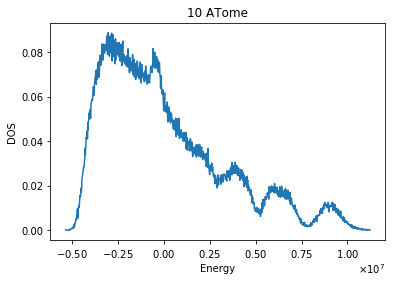

In [60]:
hist_eigs, bin_edges_eigs= np.histogram(eigenvalues, bins=1000, weights=np.ones_like(eigenvalues)/it)
plt.plot(bin_edges_eigs[:-1],hist_eigs)
plt.xlabel("Energy")
plt.ylabel("DOS")
plt.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
plt.title("10 ATome")

/home/jp/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':


Text(0.5, 1.0, '69Atome - log(E^-0.153742)')

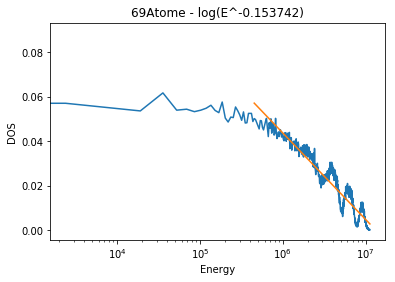

In [32]:
hist_eigs, bin_edges_eigs= np.histogram(eigenvalues, bins=1000, weights=np.ones_like(eigenvalues)/it)
plt.plot(bin_edges_eigs[:-1],hist_eigs)
plt.xscale("log")
plt.xlabel("Energy")
plt.ylabel("DOS")
plt.title("1500 Atome")

def log_func(N,a,k,c):
    return a*np.log(N**-k)+c

popt,pcov = curve_fit(log_func,bin_edges_eigs[:-1][350:],hist_eigs[350:], p0=[1,1,15])


plt.plot(bin_edges_eigs[350:],log_func(bin_edges_eigs[350:],*popt))
plt.title("69Atome - log(E^-%f)"%popt[1])

Text(0.5, 1.0, '10 Atome')

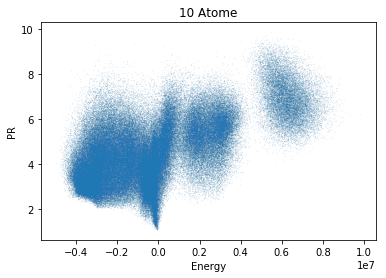

In [325]:
plt.errorbar(eigenvalues,1/ipr, linestyle="none",  marker=".", markersize=0.07)
plt.xlabel("Energy")
plt.ylabel("PR")
plt.title("10 Atome")

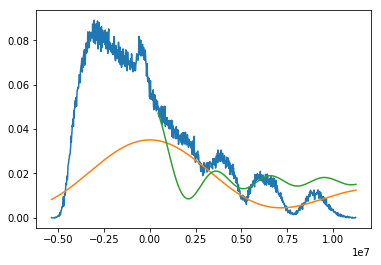

In [39]:

#plt.xscale("log")
hist_eigs, bin_edges_eigs= np.histogram(eigenvalues, bins=1000, weights=np.ones_like(eigenvalues)/it)
plt.plot(bin_edges_eigs[:-1],hist_eigs)



def func(E,a,b,k):
    return a+b*np.sin(2*np.pi*E*k)/E

popt,pcov = curve_fit(func,bin_edges_eigs[:-1][350:],hist_eigs[350:], p0=[0.5,1000000,10**-6.5])


plt.plot(bin_edges_eigs,func(bin_edges_eigs,0.01,40000,10**-7))
#plt.plot(bin_edges_eigs[:-1][300:],hist_eigs[300:])

#plt.xscale("log")

#plt.ylim(0,1)
plt.plot(bin_edges_eigs[350:],func(bin_edges_eigs[350:],*popt))

In [12]:
a=np.array([1,2,3])
b=np.array([1,2,1])
a-b

array([0, 0, 2])

In [ ]:
## spacings=np.abs(eigenvalues[1:]-eigenvalues[:-1])

hist_spacings, bin_edges_spacings= np.histogram(spacings, bins=1000)
plt.plot(bin_edges_spacings[:-1],hist_spacings)
plt.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
plt.xlim(0,0.3*10**7)
#plt.ylim(0,10000)
#plt.xscale("log")